In [11]:
#About the data:
#https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease

# State	                    : 거주구역
# Sex	                    : 성별
# GeneralHealth	            : 일상적인 몸 상태 [Excellent, Very good, Good, Fair, Poor]
# PhysicalHealthDays	    : 30일 기준, 질병이나 부상 등 신체적으로 아픈 날 수
# MentalHealthDays	        : 30일 기준, 우울이나 스트레스 등 정신적으로 아픈 날 수
# LastCheckupTime	        : 마지막으로 검진 받은 기록 [1년 이내, 1~2년, 2~5년, 5년 이상]
# PhysicalActivities	    : 운동 / 신체적 활동 있는지
# SleepHours	            : 수면 시간
# RemovedTeeth	            : 발치 수
# HadHeartAttack	        : 심장마비 경험
# HadAngina                 : 협심증
# HadStroke                 : 뇌졸증
# HadAsthma                 : 천식
# HadSkinCancer             : 피부암
# HadCOPD                   : 만성폐쇄성폐질환
# HadDepressiveDisorder     : 우울증
# HadKidneyDisease          : 신부증
# HadArthritis              : 관절염
# HadDiabetes               : 당뇨 [당뇨 아님, 전당뇨거나 경계성 당뇨, 임신성 당뇨, 당뇨]
# DeafOrHardOfHearing       : 청각장애
# BlindOrVisionDifficulty	: 시각장애
# DifficultyConcentrating	: 집중하기 힘듦
# DifficultyWalking	        : 걷기 힘듦
# DifficultyDressingBathing	: 스스로 옷을 입거나 씻기 힘듦
# DifficultyErrands	        : 일상 업무에 어려움
# SmokerStatus	            : 흡연자 [비흡연자, 금연, 종종 흡연, 매일 흡연]
# ECigaretteUsage	        : 전자담배 흡연자 [경헙 없음, 현재는 사용하지 않음, 종종 흡연, 매일 흡연]
# ChestScan	                : 가슴 CT 나 X-ray 촬영 여부
# RaceEthnicityCategory	    : 인종 [히스패닉, 흑인, 백인, 여러인종, 다른 인종) [다른 인종들은 히스패닉이 아닌 경우에만 표시]
# AgeCategory	            : 나이 카테고리 [18~24, 25~29, 30~34, 35~39, 40~44, 45~49, 50~54, 55~59, 60~64, 65~69, 70~74, 75~79, 80이상]
# HeightInMeters	        : 키
# WeightInKilograms	        : 몸무게
# BMI	                    : BMI
# AlcoholDrinkers	        : 음주 여부
# HIVTesting	            : HIV 검사 결과
# FluVaxLast12	            : 12개월 안에 감기 백신 접종 여부
# PneumoVaxEver	            : 폐렴 백신 접종 경험
# TetanusLast10Tdap	        : 10년 안에 파상풍 주사 경험 [경험 없음, Tdap 주사, Tdap 외의 다른 약물 주사, 어떤 약물인지 모름]
# HighRiskLastYear	        : 지난해 위험한 사고나 질병 경험 유무
# CovidPos                  : 코로나 확진 여부

보통 심장병의 제일 큰 major factor 는 고혈압, 고 콜레스트롤, 담배.
그 외, 당뇨, 비만 (BMI 높음), 신체적 활동, 음주과다 등도 있음.
classes are unbalanced. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
dataset = pd.read_csv("heart_2022_with_nans.csv")
print(dataset.shape)
dataset.head()

(445132, 40)


,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Alabama,Female,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,NaN,No,...,NaN,NaN,NaN,No,No,Yes,No,"Yes, received tetanus shot but not sure what type",No,No
1,Alabama,Female,Excellent,0.0,0.0,NaN,No,6.0,NaN,No,...,1.60,68.04,26.57,No,No,No,No,"No, did not receive any tetanus shot in the pa...",No,No
2,Alabama,Female,Very good,2.0,3.0,Within past year (anytime less than 12 months ...,Yes,5.0,NaN,No,...,1.57,63.50,25.61,No,No,No,No,NaN,No,Yes
3,Alabama,Female,Excellent,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,NaN,No,...,1.65,63.50,23.30,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No
4,Alabama,Female,Fair,2.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,NaN,No,...,1.57,53.98,21.77,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,No


In [5]:
dataset.describe()


,PhysicalHealthDays,MentalHealthDays,SleepHours,HeightInMeters,WeightInKilograms,BMI
count,434205.000000,436065.000000,439679.000000,416480.000000,403054.000000,396326.000000
mean,4.347919,4.382649,7.022983,1.702691,83.074470,28.529842
std,8.688912,8.387475,1.502425,0.107177,21.448173,6.554889
min,0.000000,0.000000,1.000000,0.910000,22.680000,12.020000
25%,0.000000,0.000000,6.000000,1.630000,68.040000,24.130000
50%,0.000000,0.000000,7.000000,1.700000,80.740000,27.440000
75%,3.000000,5.000000,8.000000,1.780000,95.250000,31.750000
max,30.000000,30.000000,24.000000,2.410000,292.570000,99.640000


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445132 entries, 0 to 445131
Data columns (total 40 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   State                      445132 non-null  object 
 1   Sex                        445132 non-null  object 
 2   GeneralHealth              443934 non-null  object 
 3   PhysicalHealthDays         434205 non-null  float64
 4   MentalHealthDays           436065 non-null  float64
 5   LastCheckupTime            436824 non-null  object 
 6   PhysicalActivities         444039 non-null  object 
 7   SleepHours                 439679 non-null  float64
 8   RemovedTeeth               433772 non-null  object 
 9   HadHeartAttack             442067 non-null  object 
 10  HadAngina                  440727 non-null  object 
 11  HadStroke                  443575 non-null  object 
 12  HadAsthma                  443359 non-null  object 
 13  HadSkinCancer              44

In [16]:
dataset.isna().sum()

State                            0
Sex                              0
GeneralHealth                 1198
PhysicalHealthDays           10927
MentalHealthDays              9067
LastCheckupTime               8308
PhysicalActivities            1093
SleepHours                    5453
RemovedTeeth                 11360
HadHeartAttack                3065
HadAngina                     4405
HadStroke                     1557
HadAsthma                     1773
HadSkinCancer                 3143
HadCOPD                       2219
HadDepressiveDisorder         2812
HadKidneyDisease              1926
HadArthritis                  2633
HadDiabetes                   1087
DeafOrHardOfHearing          20647
BlindOrVisionDifficulty      21564
DifficultyConcentrating      24240
DifficultyWalking            24012
DifficultyDressingBathing    23915
DifficultyErrands            25656
SmokerStatus                 35462
ECigaretteUsage              35660
ChestScan                    56046
RaceEthnicityCategor

In [17]:
dataset.isnull().sum()

State                            0
Sex                              0
GeneralHealth                 1198
PhysicalHealthDays           10927
MentalHealthDays              9067
LastCheckupTime               8308
PhysicalActivities            1093
SleepHours                    5453
RemovedTeeth                 11360
HadHeartAttack                3065
HadAngina                     4405
HadStroke                     1557
HadAsthma                     1773
HadSkinCancer                 3143
HadCOPD                       2219
HadDepressiveDisorder         2812
HadKidneyDisease              1926
HadArthritis                  2633
HadDiabetes                   1087
DeafOrHardOfHearing          20647
BlindOrVisionDifficulty      21564
DifficultyConcentrating      24240
DifficultyWalking            24012
DifficultyDressingBathing    23915
DifficultyErrands            25656
SmokerStatus                 35462
ECigaretteUsage              35660
ChestScan                    56046
RaceEthnicityCategor

<Axes: xlabel='HadHeartAttack', ylabel='count'>

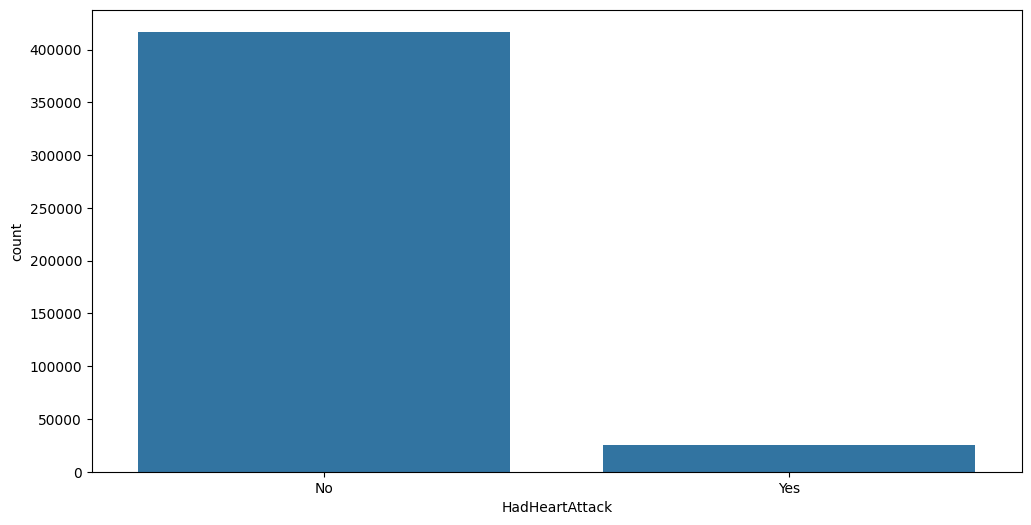

In [19]:
plt.figure(figsize = (12, 6))

sns.countplot(x = 'HadHeartAttack', data = dataset)

In [3]:
#일단 임시로 파일 복사후, 그 파일로 작업해보기

temp = dataset.copy()

# label encoding 하기 전에, 몇몇 column 들은 0~5 같은 숫자로 (poor, fair, good, very good, excellent 같은) 변환 가능한것들이 있어서 그것들을 먼저 변환 해주기.\
# label encoding 으로 할시에 이것들이 원하는식으로 변환이 안됨.
# 변환후 type 를 float 으로 바꿔놓음. (int 가 될수 있지만 아직 결측치 처리가 안되서 변환 안됨.)

#General Health encoding
temp.loc[temp["GeneralHealth"] == "Poor","GeneralHealth"] = 0
temp.loc[temp["GeneralHealth"] == "Fair","GeneralHealth"] = 1
temp.loc[temp["GeneralHealth"] == "Good","GeneralHealth"] = 2
temp.loc[temp["GeneralHealth"] == "Very good","GeneralHealth"] = 3
temp.loc[temp["GeneralHealth"] == "Excellent","GeneralHealth"] = 4
temp["GeneralHealth"] = temp["GeneralHealth"].astype('float')

#Last check up time encoding
temp.loc[temp["LastCheckupTime"] == "Within past year (anytime less than 12 months ago)","LastCheckupTime"] = 0
temp.loc[temp["LastCheckupTime"] == "Within past 2 years (1 year but less than 2 years ago)","LastCheckupTime"] = 1
temp.loc[temp["LastCheckupTime"] == "Within past 5 years (2 years but less than 5 years ago)","LastCheckupTime"] = 2
temp.loc[temp["LastCheckupTime"] == "5 or more years ago","LastCheckupTime"] = 3
temp["LastCheckupTime"] = temp["LastCheckupTime"].astype('float')

#SmokerStatus
temp.loc[temp["SmokerStatus"] == "Never smoked","SmokerStatus"] = 0
temp.loc[temp["SmokerStatus"] == "Former smoker","SmokerStatus"] = 1
temp.loc[temp["SmokerStatus"] == "Current smoker - now smokes some days","SmokerStatus"] = 2
temp.loc[temp["SmokerStatus"] == "Current smoker - now smokes every day","SmokerStatus"] = 3
temp["SmokerStatus"] = temp["SmokerStatus"].astype('float')


#ECigaretteUsage
temp.loc[temp["ECigaretteUsage"] == "Never used e-cigarettes in my entire life","ECigaretteUsage"] = 0
temp.loc[temp["ECigaretteUsage"] == "Not at all (right now)","ECigaretteUsage"] = 1
temp.loc[temp["ECigaretteUsage"] == "Use them some days","ECigaretteUsage"] = 2
temp.loc[temp["ECigaretteUsage"] == "Use them every day","ECigaretteUsage"] = 3
temp["ECigaretteUsage"] = temp["ECigaretteUsage"].astype('float')


temp.info()

# temp.loc[temp["ECigaretteUsage"] == "Poor","ECigaretteUsage"] = 0


# le = LabelEncoder()

# for columns in temp.select_dtypes(include=[object]).columns:
#     temp[columns] = le.fit_transform(temp[columns]) # 전처리 하기 전에 Object 값을 가지고 있는 행을 일단 일시적으로 label encoding 해보기.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445132 entries, 0 to 445131
Data columns (total 40 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   State                      445132 non-null  object 
 1   Sex                        445132 non-null  object 
 2   GeneralHealth              443934 non-null  float64
 3   PhysicalHealthDays         434205 non-null  float64
 4   MentalHealthDays           436065 non-null  float64
 5   LastCheckupTime            436824 non-null  float64
 6   PhysicalActivities         444039 non-null  object 
 7   SleepHours                 439679 non-null  float64
 8   RemovedTeeth               433772 non-null  object 
 9   HadHeartAttack             442067 non-null  object 
 10  HadAngina                  440727 non-null  object 
 11  HadStroke                  443575 non-null  object 
 12  HadAsthma                  443359 non-null  object 
 13  HadSkinCancer              44

In [6]:
#one hot encoding for RaceEthnicityCategory

temp_encoded = pd.get_dummies(temp, columns = ['RaceEthnicityCategory', 'TetanusLast10Tdap'])



In [7]:
le = LabelEncoder()

for columns in temp_encoded.select_dtypes(include=[object, bool]).columns:
    temp_encoded[columns] = le.fit_transform(temp_encoded[columns]) # 전처리 하기 전에 Object 값을 가지고 있는 행을 일단 일시적으로 label encoding 해보기.
    #No = 0
    #yes = 1
    #Nan = 2


남자가 여자보다 심장병 있는사람이 더 많다.

<Axes: xlabel='Sex'>

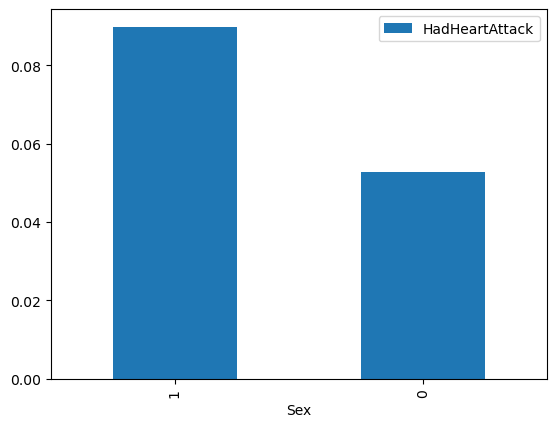

In [8]:
temp_encoded[['Sex', 'HadHeartAttack']].groupby(['Sex']).mean().sort_values(by = 'HadHeartAttack', ascending = False).plot.bar()
#남자 1, 여자 0

심장병이랑 담배의 연관성.

In [49]:
sns.pairplot(temp_onehot)

KeyboardInterrupt: 

<Axes: xlabel='SmokerStatus'>

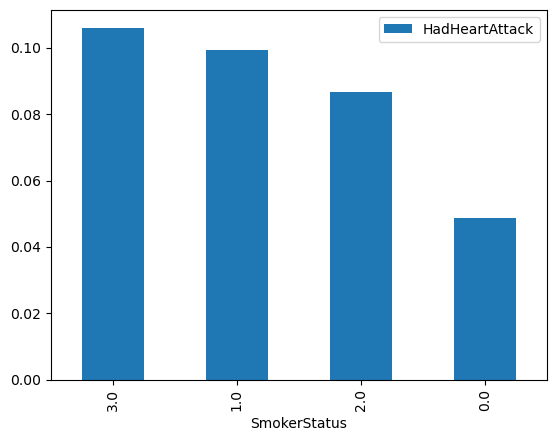

In [9]:
temp_encoded[['SmokerStatus', 'HadHeartAttack']].groupby(['SmokerStatus']).mean().sort_values(by = 'HadHeartAttack', ascending = False).plot.bar()
#0이 아예 안피워보고, 3이 가장 많이 피움.
#많이 피울수록 심장병 확률이 높음.

<Axes: xlabel='ECigaretteUsage'>

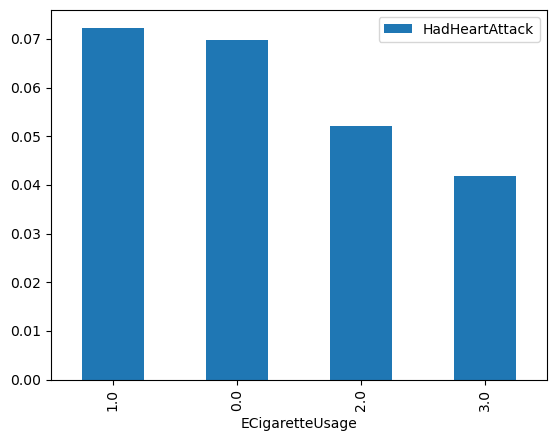

In [10]:
temp_encoded[['ECigaretteUsage', 'HadHeartAttack']].groupby(['ECigaretteUsage']).mean().sort_values(by = 'HadHeartAttack', ascending = False).plot.bar()
#0은 안피워봤고, 3은 자주 사용.
#크게 상관관계는 없어보이긴 하지만 많이 피우는 사람이 좀더 낮음.

<Axes: xlabel='SmokerStatus', ylabel='BMI'>

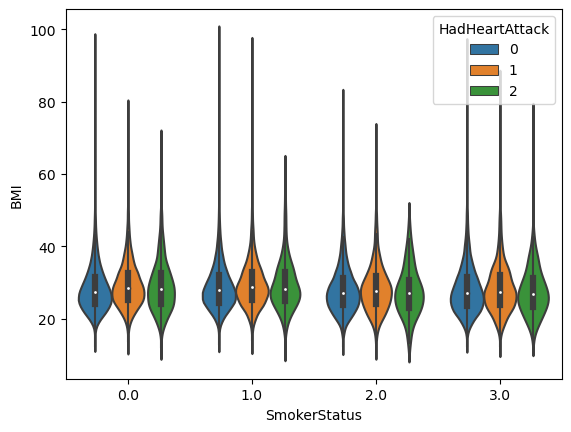

In [12]:
sns.violinplot(data=temp_encoded, x='SmokerStatus', y='BMI', hue='HadHeartAttack')

In [39]:
temp_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445132 entries, 0 to 445131
Data columns (total 47 columns):
 #   Column                                                                       Non-Null Count   Dtype  
---  ------                                                                       --------------   -----  
 0   State                                                                        445132 non-null  int32  
 1   Sex                                                                          445132 non-null  int32  
 2   GeneralHealth                                                                443934 non-null  float64
 3   PhysicalHealthDays                                                           434205 non-null  float64
 4   MentalHealthDays                                                             436065 non-null  float64
 5   LastCheckupTime                                                              436824 non-null  float64
 6   PhysicalActivities          

In [27]:
temp['TetanusLast10Tdap'].value_counts()

TetanusLast10Tdap
No, did not receive any tetanus shot in the past 10 years    121493
Yes, received tetanus shot but not sure what type            113725
Yes, received Tdap                                            99943
Yes, received tetanus shot, but not Tdap                      27455
Name: count, dtype: int64

In [8]:
temp.describe()

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
count,445132.000000,445132.000000,445132.000000,434205.000000,436065.000000,445132.000000,445132.000000,439679.000000,445132.000000,445132.000000,...,416480.000000,403054.000000,396326.000000,445132.000000,445132.000000,445132.000000,445132.000000,445132.000000,445132.000000,445132.000000
mean,27.418869,0.470061,2.261033,4.347919,4.382649,2.645838,0.763246,7.022983,1.892205,0.070177,...,1.702691,83.074470,28.529842,0.683031,0.587107,0.681816,0.688713,1.662028,0.266058,0.870488
std,15.563665,0.499103,1.454537,8.688912,8.387475,0.843548,0.430828,1.502425,1.370822,0.281111,...,0.107177,21.448173,6.554889,0.652503,0.734524,0.654722,0.748688,1.416061,0.650172,1.138057
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.910000,22.680000,12.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15.000000,0.000000,1.000000,0.000000,0.000000,3.000000,1.000000,6.000000,0.000000,0.000000,...,1.630000,68.040000,24.130000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26.000000,0.000000,2.000000,0.000000,0.000000,3.000000,1.000000,7.000000,3.000000,0.000000,...,1.700000,80.740000,27.440000,1.000000,0.000000,1.000000,1.000000,2.000000,0.000000,0.000000
75%,42.000000,1.000000,4.000000,3.000000,5.000000,3.000000,1.000000,8.000000,3.000000,0.000000,...,1.780000,95.250000,31.750000,1.000000,1.000000,1.000000,1.000000,2.000000,0.000000,2.000000
max,53.000000,1.000000,5.000000,30.000000,30.000000,4.000000,2.000000,24.000000,4.000000,2.000000,...,2.410000,292.570000,99.640000,2.000000,2.000000,2.000000,2.000000,4.000000,2.000000,3.000000
